In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
upload = files.upload()

Saving Ritz_Jager_Data.csv to Ritz_Jager_Data.csv


In [ ]:
df = pd.read_csv('Ritz_Jager_Data.csv')

In [ ]:
df

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country_origin,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

#### Where do the guests come from?

In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1MB 2.9MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=9042b9ebf3ad0a140645b1e29aa7496c75d209c505de5bb8a738eabdb720829f
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [374]:
import pycountry

# Selecting customer/not_customer
customer = df[df['is_canceled']==0]
not_customer = df[df['is_canceled']==1]

# Dataframe for customer
customer_df = pd.DataFrame(customer['country_origin'].value_counts()).reset_index()
customer_df.columns = ['country_code', 'number_of_guests']

# Dataframe that's not customer
not_customer_df = pd.DataFrame(not_customer['country_origin'].value_counts()).reset_index()
not_customer_df.columns = ['country_code', 'number_of_cancellation']

# Transform Country code into full name
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

# Function to transform country code into full name
def country_name(df):
    if (len(df['country_code'])==2 and df['country_code'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['country_code']).name
    elif (len(df['country_code'])==3 and df['country_code'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=df['country_code']).name
    else:
        return 'Invalid Code'

customer_df['country_code'] = customer_df.apply(country_name, axis=1)
not_customer_df['country_code'] = not_customer_df.apply(country_name, axis=1)

In [375]:
display(customer_df)
display(not_customer_df)

,country_code,number_of_guests
0,Portugal,21071
1,United Kingdom,9676
2,France,8481
3,Spain,6391
4,Germany,6069
...,...,...
160,Kiribati,1
161,Saint Lucia,1
162,Botswana,1
163,Nepal,1


,country_code,number_of_cancellation
0,Portugal,27519
1,United Kingdom,2453
2,Spain,2177
3,France,1934
4,Italy,1333
...,...,...
122,Ethiopia,1
123,Monaco,1
124,Costa Rica,1
125,Honduras,1


#### 2. How much do guests pay for a room per night? 

In [ ]:
print('Average price for a room per night is : ', customer['adr'].mean())

Average price for a room per night is :  99.9876929728839


In [ ]:
#divided hotel by type, as we can see from the dataset, there are 2 type of hotel, city hotel and resort hotel
cityHotel = customer[customer['hotel_type']=='City Hotel']
resortHotel = customer[customer['hotel_type']=='Resort Hotel']

print("The average guests pay for a room at City Hotel at $", cityHotel['adr'].mean(),
      '\nAnd the average guests pay for a room at Resort Hotel at $', resortHotel['adr'].mean())

The average guests pay for a room at City Hotel at $ 105.74594834298986 
And the average guests pay for a room at Resort Hotel at $ 90.78897055774631


#### 3. How does the price per night vary over the year? 

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df_new = df.copy()
df_new.set_index('reservation_status_date', inplace=True)

In [ ]:
diff_adr = df_new.resample('M').mean().dropna()

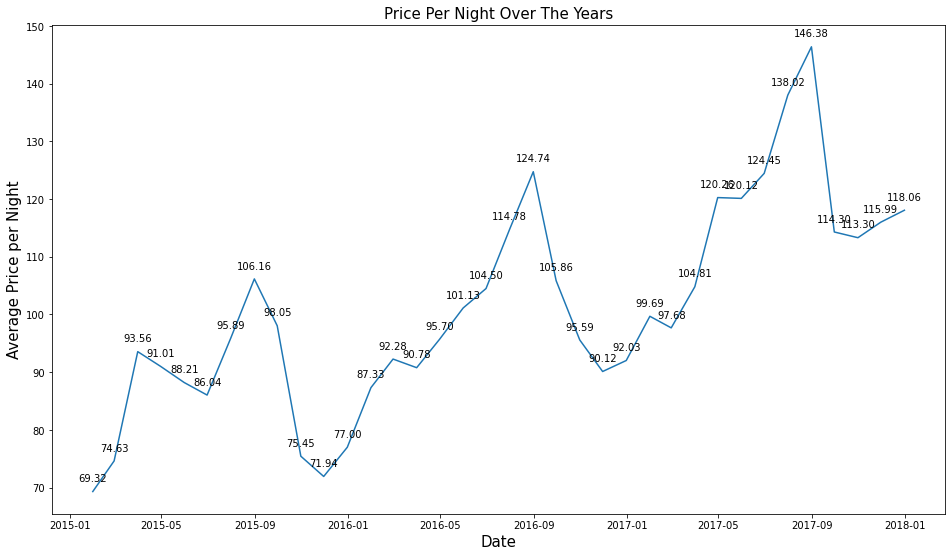

In [351]:
import matplotlib.pyplot as plt

#Visualization
plt.figure(figsize=(16,9))
plt.plot(diff_adr.index, diff_adr.adr)
plt.title('Price Per Night Over The Years', fontsize= 15)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Average Price per Night', fontsize= 15)

for x,y in zip(diff_adr.index, diff_adr.adr):

    label = "{:.2f}".format(y)

    plt.annotate(label, # text label
                 (x,y), # point to label
                 textcoords="offset points", # position of the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # center alignment

plt.show()

In [ ]:
CH_Cost_diff = df_new[df_new['hotel_type'] == 'City Hotel']
RH_Cost_diff = df_new[df_new['hotel_type'] == 'Resort Hotel']

In [ ]:
CHdiff_adr = CH_Cost_diff.resample('M').mean().dropna()
RHdiff_adr = RH_Cost_diff.resample('M').mean().dropna()

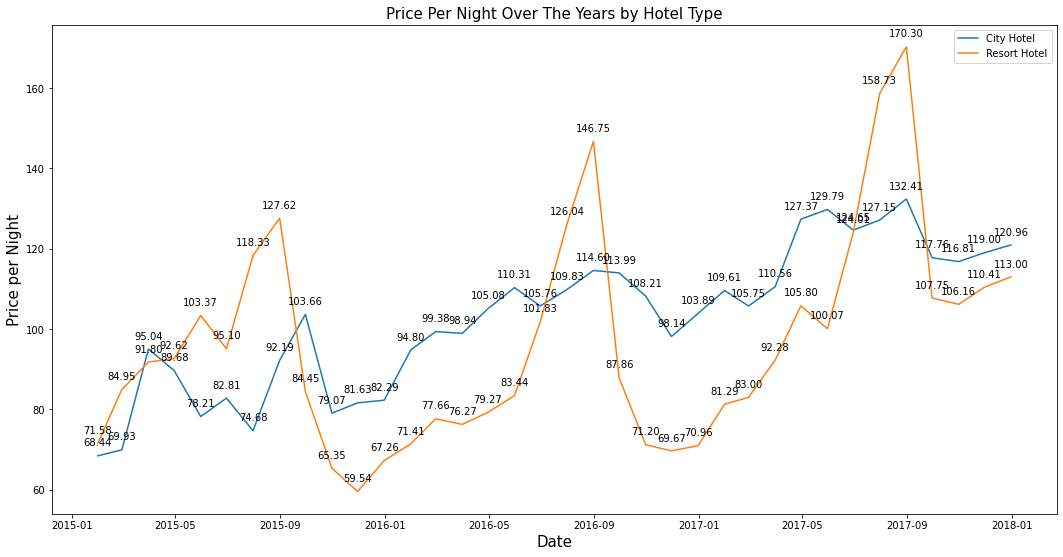

In [ ]:
import matplotlib.pyplot as plt

#Visualization
plt.figure(figsize=(18,9))
plt.plot(CHdiff_adr.index, CHdiff_adr.adr, label='City Hotel')
plt.plot(RHdiff_adr.index, RHdiff_adr.adr, label='Resort Hotel')
plt.title('Price Per Night Over The Years by Hotel Type', fontsize= 15)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Price per Night', fontsize= 15)

for hotel in [CHdiff_adr, RHdiff_adr]:
  for x,y in zip(hotel.index, hotel.adr):

    label = "{:.2f}".format(y)

    plt.annotate(label, # text label
                 (x,y), # point to label
                 textcoords="offset points", # position of the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # center alignment

plt.legend()
plt.show()

### 4. Which are the busiest months? 

In [ ]:
df_checkIn = customer.copy()

In [ ]:
df_checkIn['Reserved'].value_counts()

1    75166
Name: Reserved, dtype: int64

In [ ]:
df_checkIn.reset_index(inplace=True)

In [ ]:
df_checkIn['reservation_status_date'] = pd.to_datetime(df_checkIn['reservation_status_date'])
df_checkIn['Reserved'] = df_checkIn['is_canceled'] + 1
df_checkIn.set_index('reservation_status_date', inplace=True)

In [ ]:
busiest_month = df_checkIn.resample('M').sum().reset_index()

In [ ]:
reserv_CH = df_checkIn[df_checkIn['hotel_type'] == 'City Hotel'].resample('M').sum().reset_index()
reserv_RH = df_checkIn[df_checkIn['hotel_type'] == 'Resort Hotel'].resample('M').sum().reset_index()

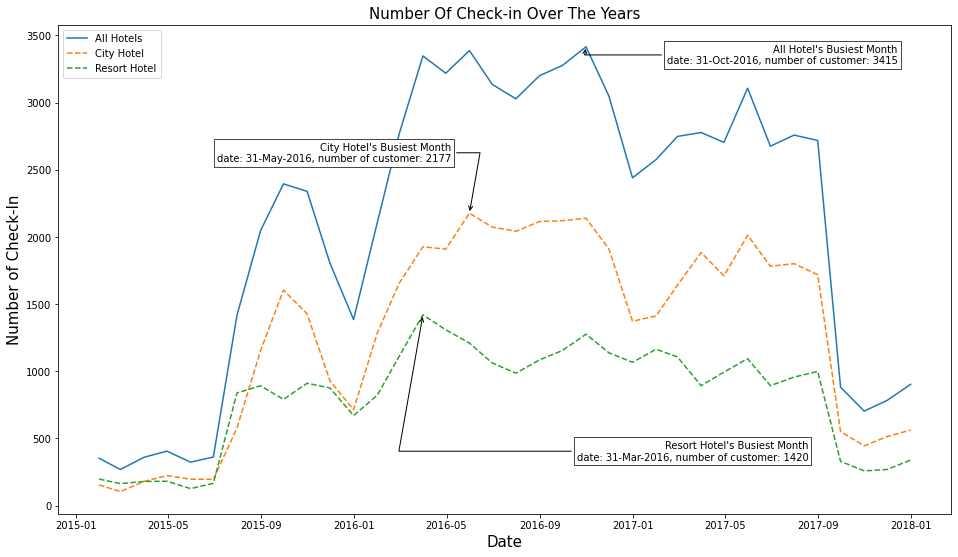

In [364]:
import matplotlib.pyplot as plt
import datetime

#Visualization
plt.figure(figsize=(16,9))
plt.plot(busiest_month['reservation_status_date'], busiest_month.Reserved, label='All Hotels')
plt.plot(reserv_CH['reservation_status_date'], reserv_CH.Reserved, linestyle='--', label='City Hotel')
plt.plot(reserv_RH['reservation_status_date'], reserv_RH.Reserved, linestyle='--', label='Resort Hotel')
plt.title('Number Of Check-in Over The Years', fontsize= 15)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Number of Check-In', fontsize= 15)

#Annotate only with maximum value
def annot_max(x, y, name=None, ax=None, xytext=(0.94,0.96)):
    xmax = x[y == y.max()]
    ymax = y.max()
    text= "{}\ndate: {}, number of customer: {:d}".\
    format(name, list(xmax.dt.strftime('%d-%b-%Y'))[0], ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=80")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=xytext, **kw)

annot_max(busiest_month['reservation_status_date'], busiest_month.Reserved, 'All Hotel\'s Busiest Month')
annot_max(reserv_CH['reservation_status_date'], reserv_CH.Reserved, 'City Hotel\'s Busiest Month', None, (0.44,0.76))
annot_max(reserv_RH['reservation_status_date'], reserv_RH.Reserved, 'Resort Hotel\'s Busiest Month', None, (0.84,0.15))

plt.legend(loc='upper left')
plt.show()


### 5.How long do people stay at the hotels?

In [ ]:
stay_df = customer.copy().reset_index()

In [ ]:
stay_df['day_spent'] = stay_df['stays_in_week_nights'] + stay_df['stays_in_weekend_nights']

In [ ]:
stay_df['day_spent'].describe()

count    75166.000000
mean         3.393023
std          2.577671
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         69.000000
Name: day_spent, dtype: float64

Approximately 3-4 days average people stay at the hotels and the longest day is 69 days.

### 6. Booking by Market Segment

In [354]:
book = df[['market_segment','reservation_status']]
segment = book.groupby('market_segment').count().sort_values(by='reservation_status',ascending=False)
segment['percentage (%)'] = ((segment['reservation_status'] / sum(segment['reservation_status'])) * 100).round(3)

In [355]:
segment

,reservation_status,percentage (%)
market_segment,,
Online TA,56477,47.305
Offline TA/TO,24219,20.286
Groups,19811,16.594
Direct,12606,10.559
Corporate,5295,4.435
Complementary,743,0.622
Aviation,237,0.199
Undefined,2,0.002


### 7.How many bookings were cancelled? 

In [ ]:
print('Total of bookings that were cancelled: ', df['is_canceled'].value_counts()[1])

Total of bookings that were cancelled:  44224


### 8. Which month has the highest number of cancellations? 

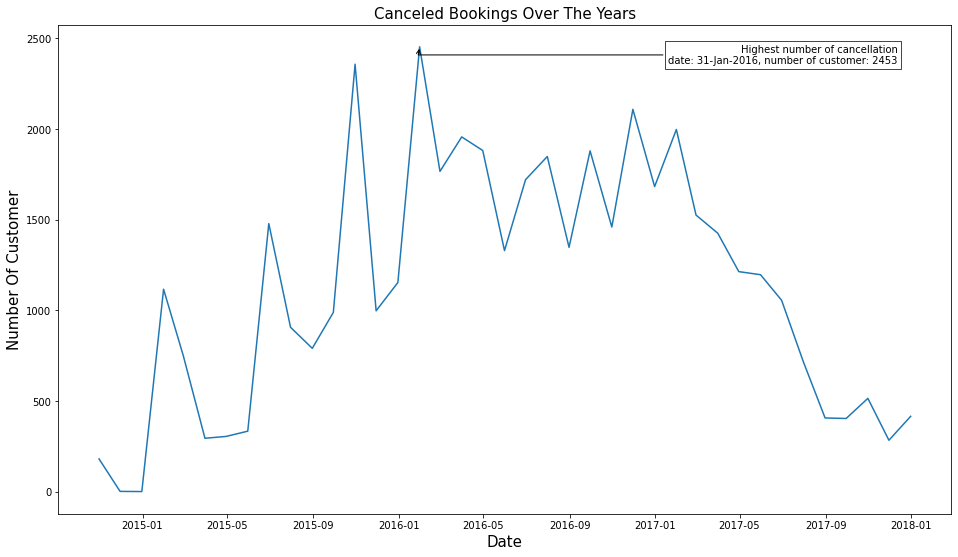

In [367]:
#Group By Mounth
calcellations_df = df.copy()
calcellations_df.set_index("reservation_status_date", inplace = True) 
calcellations_df = calcellations_df[(calcellations_df["is_canceled"] == 1)]
calcellations_df = calcellations_df.resample('M').sum().reset_index()

#Visualization
plt.figure(figsize=(16,9))
plt.plot(calcellations_df['reservation_status_date'], calcellations_df.is_canceled)
plt.title('Canceled Bookings Over The Years', fontsize= 15)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Number Of Customer', fontsize= 15)

annot_max(calcellations_df['reservation_status_date'], calcellations_df.is_canceled, 'Highest number of cancellation')

plt.show()